# Dimensionality Reduction

- The *curse of dimensionality* refers to the fact that many ML problems involve thousands or even millions of features. This makes training extremely slow, and sometimes makes it very difficult to find a good solution.
- In real world problems, it is often possible to reduce the number of features considerably.
    - For example, with the MNIST images, the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information.
    - Additionally, two neighboring pixels are often highly correlated: if you merge them into a single pixel (e.g. by taking the mean of the two pixel intensities), you will not lose much information.

***Reducing dimensionality does cause some information loss, just like compressing an image to JPEG can degrade its quality, so even though it will speed up training, it may make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. Therefore, I recommend you first try to train your system with the original data before considering using dimensionality reduction. In some cases, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance, but in general it won't: it will just speed up training.***

- Dimensionality reduction is also extremely useful for data visualization. 
- Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and gain some important insights by visually detecting patterns, such as clusters.
- Moreover, data visualization is essential to communicate your conclusions to people who are not data scientists.

### The Curse of Dimensionality
- Many things behave differently in high-dimensional space.
- High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other.
- This also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations.
- **In short, the more dimensions the training set has, the greater the risk of overfitting it.**
- In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances.
    - Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions.

### Main Approaches to Dimensionality Reduction
#### Projection
- In most real-world problems, training instances are *not* spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated.
- As a result, all training instances lie within (or close to) a much lower-dimensional *subspace* of the high-dimensional space.
- Conceptually: Projection is "casting" high-dimensional data onto a lower-dimensional surface — like casting a 3D shadow onto a 2D wall.
- Explanation:
    - Lets say we have a bunch of points in **3D space**:
    $$
    (x_1, y_1, z_1) \\
    (x_2, y_2, z_2)
    $$
    - Now imagine we pick a **2D plane** floating through 3D space - not necessarily aligned with XY, YZ or XZ planes. It could be titled at any angle.
    - **Projection**:
        - You then project each 3D point onto that 2D plane - like dropping a perpendicular from the 3D point onto the plane.
        - The point where it lands on the plane is the **projection**.
    - Once all your 3D points have been projected onto this 2D plane, you can flatten the plane and describe each point by 2 coordinates in this new 2D space.
        

#### Manifold Learning
- Projection is not always the best approach to dimensionality reduction.
- In many cases, the subspace may twist and turn, such as in the famous Swiss roll toy dataset.
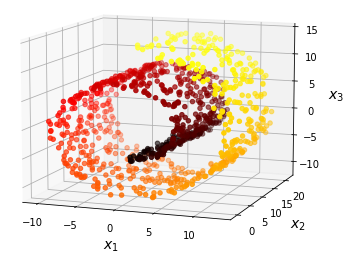
- Simply projecting onto a plane (e.g. by dropping $x_3$) would squash different layers of the Swiss roll together:

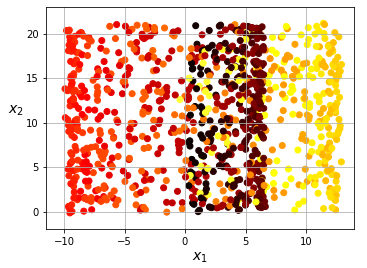

- What you probably want instead is to unroll the the swiss roll to obtain the dataset below:

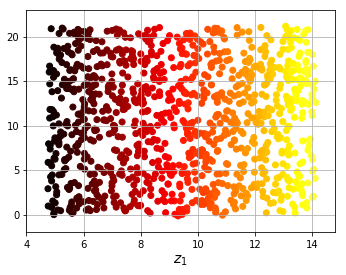

- The Swiss roll is an example of a 2D *manifold*.
- Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher dimensional space.
- More generally, a *d*-dimensional manifold is a part of an *n*-dimensional space (where $d$ < $n$) that locally resembles a $d$-dimensional hyperplane.
- In the case of the Swiss roll, $d = 2$ and $n = 3$: it locally resembles a 2D plane, but it is rolled in 3D.

- Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called *manifold learning*. 
- It relies on the *manifold assumption*, also called the *manifold hypothesis*, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. 
- This assumption is very often empirically observed.

- Think about the MNIST dataset: all handwritten digit images have some similarities. 
- They are made of connected lines, the borders are white, and they are more or less centered. 
- If you randomly generated images, only a ridiculously tiny fraction of them would look like handwritten digits. 
- In other words, the degrees of freedom available to you if you try to create a digit image are dramatically lower than the degrees of freedom you have if you are allowed to generate any image you want.
- These constraints tend to squeeze the dataset into a lower-dimensional manifold.

- The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold.
- For example, in the first image below the dataset is in 3D space, and the decision boundary will be fairly complex, but in the second image below the dataset is in 2D unrolled manifold space, and the decision boundary is simply a line.

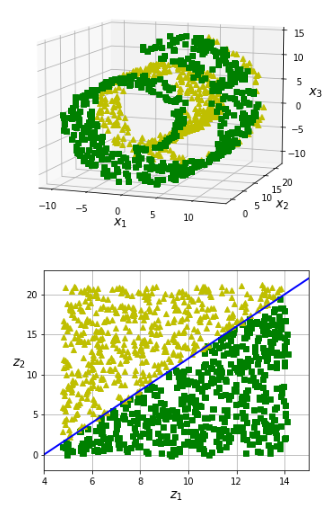



- This implicit assumption does not always hold.
- For example, in the first image below, the decision boundary of the dataset is located at $x_1 = 5$. 
    - This decision boundary looks very simple in the original 3D space.
    - But it looks more complex in the unrolled manifold 2D space (a collection of four independent line segments).

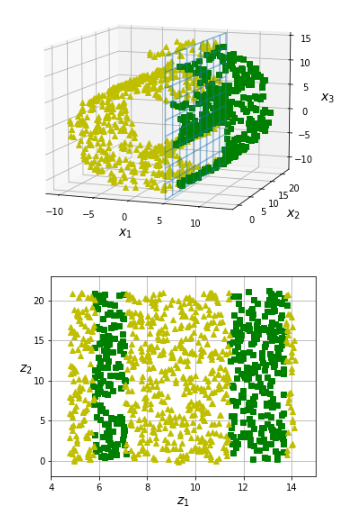

- In short, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution: it all depends on the dataset.

### PCA
- *Principal component analysis* (PCA) is by far the most popular dimensionality reduction algorithm.
- First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

#### Preserving the Variance 
-  Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane.
- For example, in the first image below, we have a simple 2D dataset along with 3 different axes. 
- To the left, is the result of the projection of this dataset onto each of these axes.

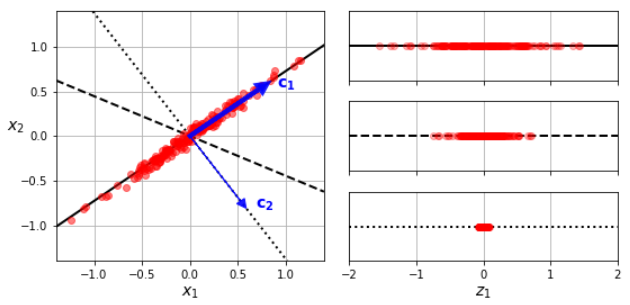

- The projection onto the solid line preserves the maximum variance (top).
- While the projection onto the dotted line preserves very little variance (bottom).
- The projection onto the dashed line preserves an intermediate amount of variance (middle).
- It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections.
- Another way to justify this choice is that it is **the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis**.
- This is the rather simple idea behind PCA.

***To understand graph above:***

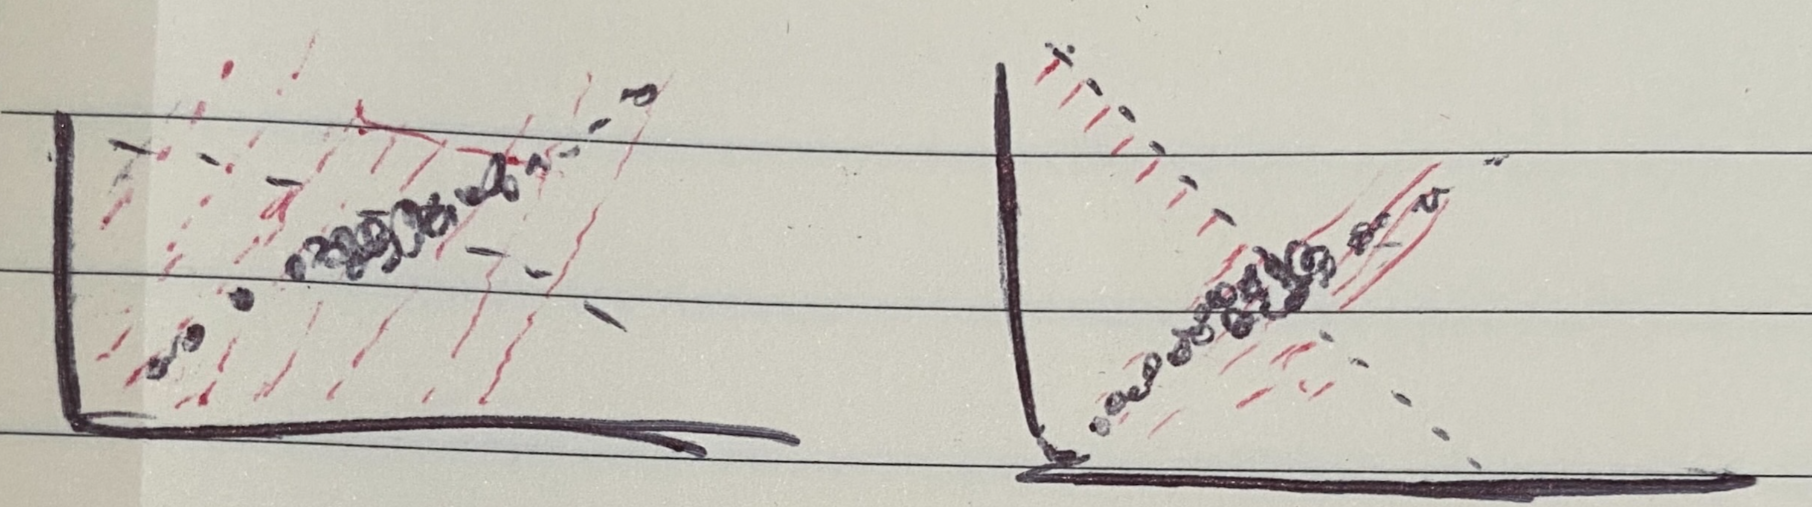

- Remember *projection* is finding the point on a plane where your instance would come into contact with that plane if a **perpendicular** line was drawn to connect the two!
- Red lines in my scrap diagram above represent those perpendicular lines.

### Principal Components
- PCA identifies the axis that accounts for the largest amount of variance in the training set (in the example above it is the solid line).
- It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of the remaining variance.
- In the 2D example, there is no choice: it is the dotted line. (**This is because only $c_2$ is orthogonal (perpendicular) to $c_1$.**)
- If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth and fifth and so on - as many axes as the number of dimensions in the dataset.

- The $i^{th}$ axis is called the $i^th$ *principal component* (PC) of the data.
- In Aurelien's figure above, the first PC is the axis on which vector $\mathbf{c}_1$ lies.
- The second PC is the axis on which vector $\mathbf{c}_2$ lies.

***For each principal component, PCA finds a zero-centered unit vector pointing in the direction of the PC. Since two opposing unit vectors lie on the same axis, the direction of the unit vectors returned by PCA is not stable: if you perturb the training set slightly and run PCA again, the unit vectors may point in the opposite directions as the original vectors. However, they will generally still lie on the same axes. In some cases, a pair of unit vectors may even rotate or swap (if the variances along these two axes are very close), but the plane they define will generally remain the same.***

- How can we find the principal components of a training set?
- There is a standard matrix factorization technique called *singular value decomposition* (SVD) that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of three matrices $\mathbf{U \sum V^T}$, where $\mathbf{V}$ contains the unit vectors that define all the principal components that you are looking for.
- The Equation is shown below for $V$: the *principal components matrix*:
$$
\mathbf{V} = 
(
\begin{matrix}
c_1 \\
c_2 \\
\vdots \\
c_3
\end{matrix}
)
$$

In [1]:
# Using Numpy's svd function to obtain all the principal components of a 3D training set.
import numpy as np

from scipy.spatial.transform import Rotation

# Generates a small 3D dataset
m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit
X.shape

(60, 3)

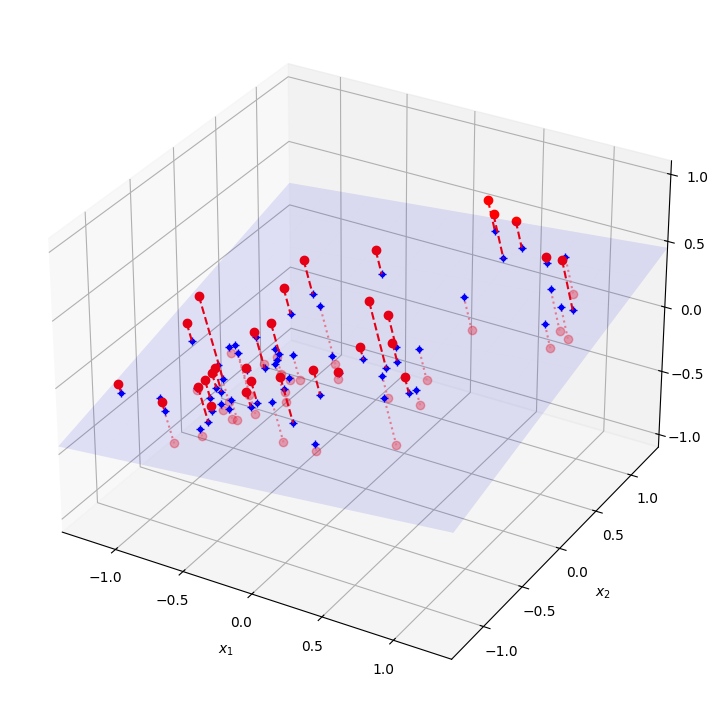

In [2]:
# Visualizes that dataset
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

In [3]:
X_centered = X - X.mean(axis=0)
U, eps, Vt = np.linalg.svd(X_centered)

In [4]:
Vt

array([[ 0.67857588,  0.70073508,  0.22023881],
       [-0.72817329,  0.6811147 ,  0.07646185],
       [-0.09642839, -0.21225719,  0.97244458]])

***PCA assumes that the dataset is centered around the origin. Scikit-Learn's PCA classes take care of centering the data for you. If you implement PCA yourself, or if you use other libraries, don't forget to center the data first.***

### Projecting Down to d Dimensions
- Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components. 
- Selecting this hyperplane ensures that the projection will preserve as much variance as possible. 
- For example, in the most recent figure above, the 3D dataset is projected down to the 2D plane defined by the first two principle components, preserving a large part of the dataset's variance. As a result, the projection looks very much like the original 3D dataset.

- To project the training set onto the hyperplane and obtain a reduced dataset $\mathbf{X}_\text{d-proj}$ of dimensionality $d$, compute the matrix multiplication of the training set matrix $\mathbf{X}$ by the matrix $\mathbf{W}_d$, defined as the matrix containing the first $d$ columns of $\mathbf{V}$, as shown below:
$$
\mathbf{X}_\text{d-proj} = \mathbf{X}\mathbf{W}_d
$$

In [5]:
# Projects the training set onto the plane defined by the first two principal components
X_d_proj =np.dot(X_centered, Vt[:, :2])
X_d_proj.shape

(60, 2)

In [6]:
# Or as Aurelien has it 
W2 = Vt[:2].T
X2D = X_centered @ W2
X2D.shape

(60, 2)

***Great! Now we know how to reduce the dimensionality of any dataset by projecting it down to any number of dimensions, while preserving as much variance as possible.***

### Using Scikit-Learn
- Scikit-Learn's PCA class uses SVD to implement PCA, just like we did earlier. 
- The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note that it automatically takes care of centering the data).

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D.shape

(60, 2)

- After fitting the PCA transformer to the dataset, it `components_` attribute holds the transpose of $\mathbf{W}_d$: it contains one row for each of the first $d$ principal components.

### Explained Variance Ratio
- Another useful piece of information is the *explained variance ratio* of each principal component, available via the `explained_variance_ratio_` variable. 
- The ratio indicates the proportion of the dataset's variance that lies along each principal component. 

In [8]:
# For example, let us look at the explained variance ratios of the first two components of the 3D dataset from above
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

- This output tells us that about 76% of the dataset's variance lies along the first PC, about 15% lies along the second PC. 
- This leaves about 9% for the third PC, so it is reasonable to assume that the third PC probably carries little information.

### Choosing the Right Number of Dimensions
- Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance - say 95%. 
- An exception to this rule, of course, is if you are reducing dimensionality for data visualization, in which case you will want to reduce the dimensionality down to 2 or 3.

In [9]:
# Load and split the MNIST dataset and then perform PCA without reducing dimensionality
# then compute the minimum number of dimensions required to preserve 95% of the training set's variance
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [10]:
pca_mnist_ta = PCA()
pca_mnist_ta.fit(X_train)


PCA()

In [11]:
total_ratio = 0
ratio_idxs = []
for idx, ratio in enumerate(pca_mnist_ta.explained_variance_ratio_):
    total_ratio += ratio
    ratio_idxs.append(idx)
    if total_ratio >= 0.95:
        break

In [12]:
print(total_ratio)
print(len(ratio_idxs))

0.9501960192613037
154


In [13]:
# Looks like we need 154 components
pca_mnist_ta = PCA(n_components=len(ratio_idxs))
X_train_ta = pca_mnist_ta.fit_transform(X_train)
X_train_ta.shape

(60000, 154)

In [14]:
###### THIS IS HOW AURELIEN ACCOMPLISHES SAME ######
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


- You could then set the `n_components=d` but there is a better option.
- You can set `n_components` to be a float between 0.0 and 1.0 specifiying the variance you wish to preserve.

In [15]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [16]:
X_reduced.shape

(60000, 154)

- If you are using dimensionality reduction as a preprocessing step for a supervised learning task (e.g. classification), then you can tune the number of dimensions as you would any other hyperparameter.
- For example, the following code creates a two-step pipeline:
    - First reducing dimensionality using PCA
    - Then classifying using a random forest
    - Next, it uses `RandomizedSearchCV` to find a good combinationof hyperparameters for both PCA and the random forest classifier.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)

param_distrib = {
    "pca__n_components" : np.arange(10, 80), # 10 - 79
    "randomforestclassifier__n_estimators" : np.arange(50, 500) # 50 - 499
}

rnd_search = RandomizedSearchCV(
    clf,
    param_distrib,
    n_iter=10, cv=3, random_state=42
)

rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [18]:
# Showing the best hyperparameters found
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}


- Interesting to note: we dropped the number of dimensions drastically - from 784 to 57. 
- This is tied to the fact that we used a a random forest, which is a pretty powerful model.
- If we used a linear model instead, such as an `SGDClassifier`, the search would find that we need to preserve more dimensions.

### PCA for Compression
- After dimensionality reduction, the training set takes up much less space.
- For example, after applying PCA to the MNIST dataset while preserving 95% of its variance, we are left with 154 features, instead of the original 784 features.
- So the dataset is now less than 20% of its original size, and we only lost 5% of its variance!
- This is a reasonable compression ratio, and it's easy to see how such a size reduction would speed up a classification algorithm tremendously. 

- It is also possible to decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection. 
- This won't give you back the original data, since the projection lost a bit of information (within the 5% variance that was dropped), but it will likely be very close to the original data.
- The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the *reconstruction error*. 
- The inverse transformation equation is shown below:
$$
\mathbf{X}_{\text{recovered}} = \mathbf{X}_{d\text{-proj}} \mathbf{W}_d^{\text{T}}
$$

In [19]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

### Randomized PCA
- If you set the `svd_solver` hyperparameter to "`randomized`", Scikit-Learn uses a stochastic algorithm called *randomized PCA* that quickly finds an approximation of the first *d* principal components.
- Its computational complexity is $O(m \times d^2) + O(d^3)$, instead of $O(m \times n^2) + O(n^3)$ for the full SVD approach., so it is dramatically faster than full SVD when $d$ is much smaller than $n$.

In [20]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

***By default, `svd__solver` is actually set to "auto": Scikit-Learn automatically uses the randomized PCA algorithm if max(m, n) > 500 and `n_components` is an integer smaller than 80% of min(m, n), or else it uses the full SVD approach. So the preceding code would use the randomized PCA algorithm even if you removed the `svd_solver=`"`randomized` argument, since 154 < 0.8 $\times$ 784. If you want to force Scikit-Learn to use full SVD for a slightly more precise result, you can set the `svd_solver` hyperparameter to "`full`"***

### Incremental PCA
- The preceding implementations of PCA require the whole training set to fit in memory in order for the algorithm to run.
- *Incremental PCA* (IPCA) algorithms have been developed that allow you to split the training set into mini-batches and feed these in one mini-batch at a time. 
- This is useful for large training sets and for applying PCA online (i.e. on the fly, as new instances arrive).

In [21]:
## Splits the MNIST training set into 1000 mini-batches and feeds them to the Incremental PCA
## to reduce dimensionality down to 154 dimensions.
## Note that we must call the partial_fit() method with each mini-batch, rather than the fit() method

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [22]:
X_reduced = inc_pca.transform(X_train)

### Random Projection
- For very high-dimensional datasets, PCA can be too slow. 
- Even if you use randomized PCA its computational complexity is still $O(m \times d^2) + O(d^3)$, so the target number of dimensions $d$ must not be too large.
- If you are dealing with a dataset with tens of thousands features or more (e.g. images), then training will become much too slow: in this case, you should consider using random projection instead.

- The random projection algorithm projects the data to a lower-dimensional space using a random linear projection.
- It turns out that such a projection is very likely to preserve distance fairly well.
    - So two similar instances will remain similar after the projection, and two very different instances will remain very different.